In [196]:
import pandas as pd

#Data retreived from https://www.baseball-reference.com/leagues/MLB/pitch.shtml
fileURL = 'https://gitlab.com/jgarrard/MLB/raw/master/data/yearlyPitchingStats.csv'
data = pd.read_csv(fileURL)
print(data.shape)
data.set_index('Year', inplace=True)
#drop 2018 since data is incomplete
data = data.drop(data.index[0])

#Drop all pitching data before 1933, our other data set only has data from this time
data = data.drop(data.index[-62:])
#print(data.index[-1])

(148, 33)


In [138]:
print(data.shape)
data.head()

(85, 32)


Tms   #P  PAge   R/G   ERA     G    GF    CG   SHO  tSho  ...      BF  \
Year                                                            ...           
2017   30  755  28.5  4.65  4.36  4860  0.99  0.01  0.01  0.05  ...   38.13   
2016   30  742  28.3  4.48  4.19  4856  0.98  0.02  0.01  0.06  ...   38.01   
2015   30  735  28.4  4.25  3.96  4858  0.98  0.02  0.01  0.07  ...   37.80   
2014   30  692  28.5  4.07  3.74  4860  0.98  0.02  0.01  0.07  ...   37.85   
2013   30  679  28.4  4.17  3.87  4862  0.97  0.03  0.01  0.07  ...   38.02   

      ERA+   WHIP  BAbip   H9  HR9  BB9  SO9  SO/W     E  
Year                                                      
2017   101  1.342  0.300  8.8  1.3  3.3  8.3  2.53  0.58  
2016   101  1.325  0.300  8.8  1.2  3.1  8.1  2.58  0.58  
2015   101  1.294  0.299  8.7  1.0  2.9  7.8  2.66  0.58  
2014   101  1.275  0.298  8.6  0.9  2.9  7.7  2.67  0.60  
2013   101  1.300  0.297  8.7  1.0  3.0  7.6  2.51  0.56  

[5 rows x 32 columns]

## Compare pitching statistics over the years. To do so, adjust each year's average stat by the batters faced (BF)

Plot games finished (GF) to a get sense of how much more baseball is being played

Stats of interest: ERA, SO (strikeouts), Strikeout rates? (SO/batters faced?), 

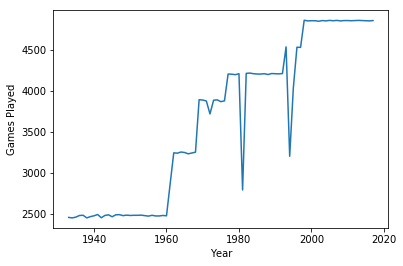

In [140]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['G'],'-')
plt.ylabel('Games Played')
plt.xlabel('Year')
plt.show()

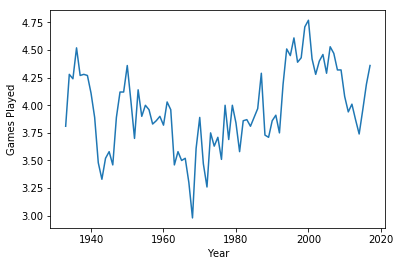

In [141]:
plt.plot(data.index, data['ERA'],'-')
plt.ylabel('Games Played')
plt.xlabel('Year')
plt.show()

In [197]:
stats = data[['G','ERA', 'SO']]
stats['ERA_adj'] = stats['ERA'].divide(stats['G'])*100
stats['SO_adj'] = stats['SO'].divide(stats['G'])*100
stats.head()

/Users/justingarrard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/justingarrard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


G   ERA    SO   ERA_adj    SO_adj
Year                                      
2017  4860  4.36  8.25  0.089712  0.169753
2016  4856  4.19  8.03  0.086285  0.165362
2015  4858  3.96  7.71  0.081515  0.158707
2014  4860  3.74  7.70  0.076955  0.158436
2013  4862  3.87  7.55  0.079597  0.155286

Text(0.5,0,'Year')

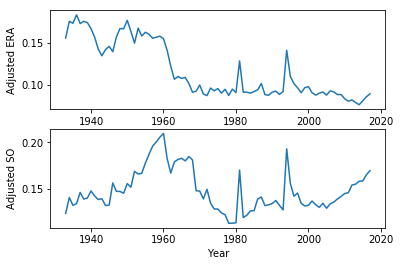

In [198]:
plt.subplot(211)
plt.plot(stats.index, stats['ERA_adj'],'-')
plt.ylabel('Adjusted ERA')
plt.xlabel('Year')

plt.subplot(212)
plt.plot(stats.index, stats['SO_adj'], '-')
plt.ylabel('Adjusted SO')
plt.xlabel('Year')

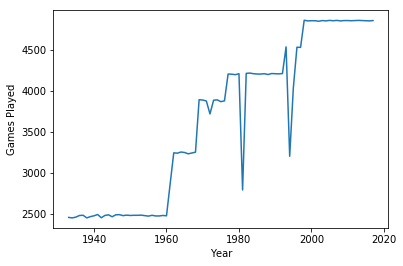

In [146]:
plt.plot(stats.index, stats['G'], '-')
plt.ylabel('Games Played')
plt.xlabel('Year')
plt.show()

1994 3200.0
1981 2788.0


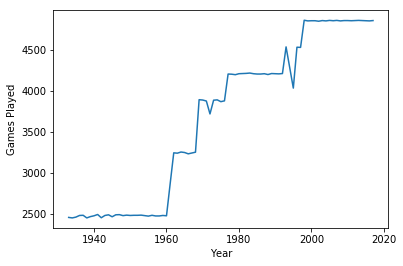

In [147]:
for index, row in stats.iterrows():
    if(row["G"] < 3500 and index > 1970):
        print(index, row["G"])
#The years 1994 & 1981 had something weird going on, they didn't play as many games: there were strikes
stats = stats.drop([1994,1981])

plt.plot(stats.index,stats['G'], '-')
plt.ylabel('Games Played')
plt.xlabel('Year')
plt.show()

Text(0.5,0,'Year')

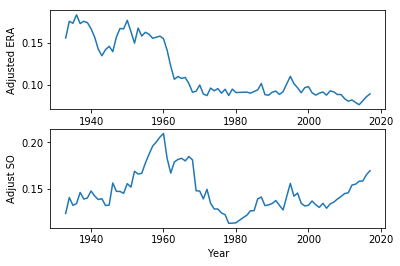

In [148]:
plt.subplot(211)
plt.plot(stats.index, stats['ERA_adj'],'-')
plt.ylabel('Adjusted ERA')
plt.xlabel('Year')

plt.subplot(212)
plt.plot(stats.index, stats['SO_adj'], '-')
plt.ylabel('Adjust SO')
plt.xlabel('Year')
plt.show()

(5219, 8)
1933    36
1934    41
1935    41
1936    43
1937    48
Name: yearID, dtype: int64


Text(0.5,0,'Year')

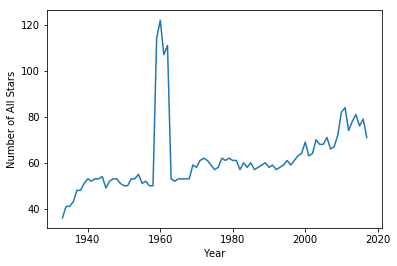

In [179]:
fileURL = 'https://gitlab.com/jgarrard/MLB/raw/master/data/AllstarFull.csv'
data = pd.read_csv(fileURL)
print(data.shape)
starsPerYear = (data['yearID'].value_counts())
starsPerYear = starsPerYear.sort_index()

print(starsPerYear.head())
plt.plot(starsPerYear.index, starsPerYear.values, '-')
plt.ylabel('Number of All Stars')
plt.xlabel('Year')
plt.show()

In [182]:
#Drop all years pre-1963
starsPerYear = starsPerYear.drop(starsPerYear[starsPerYear.index < 1963].index)
print(starsPerYear.head())

1963    53
1964    52
1965    53
1966    53
1967    53
Name: yearID, dtype: int64


1963    20
1964    20
1965    20
1966    20
1967    20
Name: yearID, dtype: int64


Text(0.5,0,'Year')

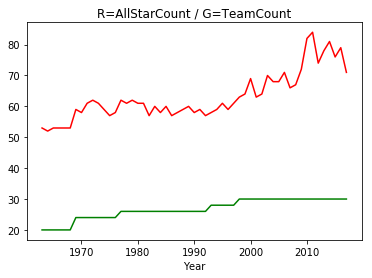

In [188]:
#Count the number of teams/year
fileURL = 'https://gitlab.com/jgarrard/MLB/raw/master/data/Teams.csv'
data = pd.read_csv(fileURL)
teamsPerYear = data['yearID'].value_counts()
teamsPerYear = teamsPerYear.sort_index()
teamsPerYear = teamsPerYear.drop(teamsPerYear[teamsPerYear.index < 1963].index)
print(teamsPerYear.head())

plt.plot(starsPerYear.index, starsPerYear.values, 'r-', teamsPerYear.index, teamsPerYear.values, 'g-')
plt.title('R=AllStarCount / G=TeamCount')
plt.xlabel('Year')
plt.show()

1963    2.65
1964    2.60
1965    2.65
1966    2.65
1967    2.65
Name: yearID, dtype: float64


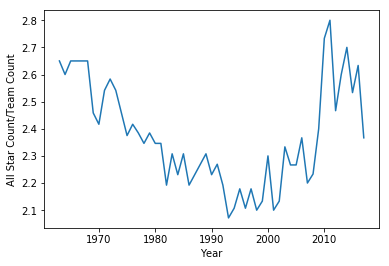

yearID
count  55.000000
mean    2.372539
std     0.191223
min     2.071429
25%     2.230769
50%     2.346154
75%     2.537500
max     2.800000

In [191]:
starsPerTeam = starsPerYear/teamsPerYear
print(starsPerTeam.head())

plt.plot(starsPerTeam.index, starsPerTeam.values, '-')
plt.ylabel('All Star Count/Team Count')
plt.xlabel('Year')
plt.show()

starsPerTeam.to_frame().describe()

I'm good saying that the average number of all-stars per team in the MLB has not changed drastically between 1962-2017

## All this is to say: We will use player/all-star data from 1962->2017!!